# Exploratory Data Analysis

In [1]:
# %pip install ydata-profiling
# %pip install hvplot

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import hvplot.pandas
import hvplot.dask

# Import Statistical Packages
from scipy import stats


# Importing pandas_profilling
from ydata_profiling import ProfileReport

# Set default plotting style and set all parematers as standard ready to publish plots
def set_plotting_style():
    # Set the default style
    sns.set_style("darkgrid")

    # Set the default context with font scale
    sns.set_context("paper",
                    font_scale=1.3, rc={"lines.linewidth": 1.0})

    # Set the default color palette
    sns.set_palette("plasma")

    # Set the default figure size
    plt.rcParams['figure.figsize'] = [8, 6]

# Call the function to set the default plotting style
set_plotting_style()
         
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')  

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [4]:
import os

# Check if the file exists
if os.path.exists(r'C:/Users/HP/Desktop/Med_Cost_Prediction/Data/Processed/cleaned_data.csv'):
    # Import the clean dataset    
    clean_medcost_df = pd.read_csv('C:/Users/HP/Desktop/Med_Cost_Prediction/Data/Processed/cleaned_data.csv')

else:
    print("File not found!")
    
# Display first few rows of the dataset
clean_medcost_df.head()    


age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [5]:
# Create the ProfileReport object
profile = ProfileReport(clean_medcost_df, title='Pandas Profiling Report', explorative=True)

# Save report to file
profile.to_file("your_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
profile

## Univariate Analysis

### Numerical Features

1. AGE

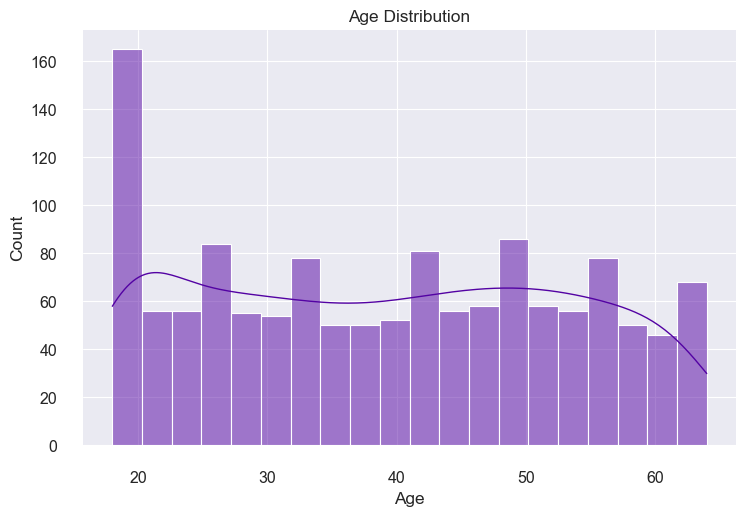

In [7]:
# Age Distribution
try:
    sns.displot(
        data=clean_medcost_df,
        x='age',
        kind='hist',
        kde=True,
        bins=20,
        aspect=1.5
    )
    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Count")
    sns.despine(offset=10, trim=True)
    plt.show()
except Exception as e:
    print(e)

3. BMI


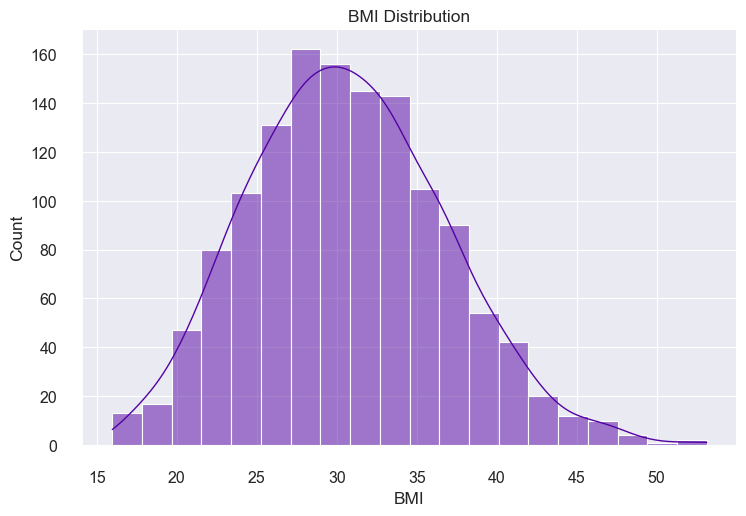

In [8]:
# BMI Distribution
try:
    sns.displot(
        data=clean_medcost_df,
        x='bmi',
        kind='hist',
        kde=True,
        bins=20,
        aspect=1.5
    )
    plt.title("BMI Distribution")
    plt.xlabel("BMI")
    plt.ylabel("Count")
    sns.despine(offset=10, trim=True)
    plt.show()
except Exception as e:
    print(e)

4. Number of Children

In [9]:
# Count the number of people in each category of children
children = clean_medcost_df.groupby('children')[['children']].count().rename(columns={'children':'count'}).sort_values(by='count', ascending=False)
print(children)

          count
children       
0           573
1           324
2           240
3           157
4            25
5            18


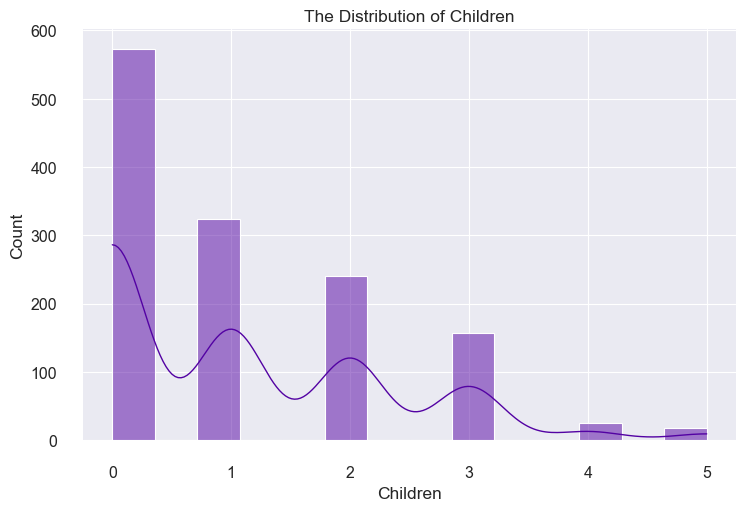

In [10]:
# The Distribution of Number of Children an Insured Has
try:
    sns.displot(
        data=clean_medcost_df,
        x='children',
        kind='hist',
        kde=True,
        aspect=1.5
    )
    plt.title("The Distribution of Children")
    plt.xlabel("Children")
    plt.ylabel("Count")
    sns.despine(offset=10, trim=True)
    plt.show()
except Exception as e:
    print(e)

5. CHARGES

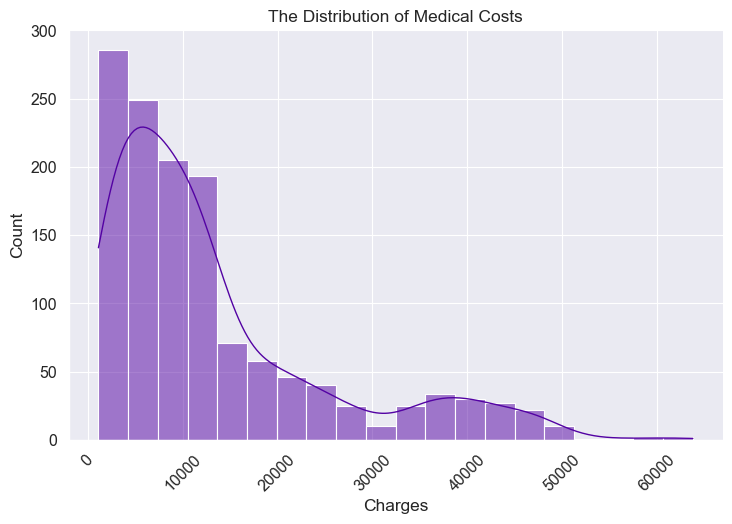

In [11]:
# The Distribution of Medical Cost Charges
try:
    sns.displot(
        data=clean_medcost_df,
        x='charges',
        kind='hist',
        kde=True,
        bins=20,
        aspect=1.5
    )
    plt.xticks(rotation=45)
    plt.title("The Distribution of Medical Costs")
    plt.xlabel("Charges")
    plt.ylabel("Count")
    # sns.despine(offset=10, trim=True)
    plt.show()
except Exception as e:
    print(e)

### Categorical Features

1. SEX

In [12]:
# Count the number of males and females in our dataset                         
gender = clean_medcost_df.groupby('sex')[['sex']].count().rename(columns={'sex':'count'})
print(gender)

        count
sex          
female    662
male      675


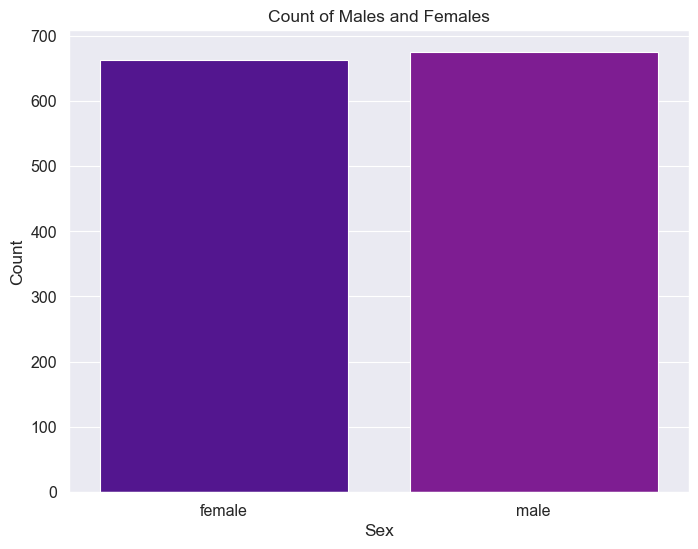

In [14]:
# Create the countplot
sns.countplot(x='sex', data=clean_medcost_df)

# Set the title and labels
plt.title('Count of Males and Females')
plt.xlabel('Sex')
plt.ylabel('Count')

# Show the plot
plt.show()

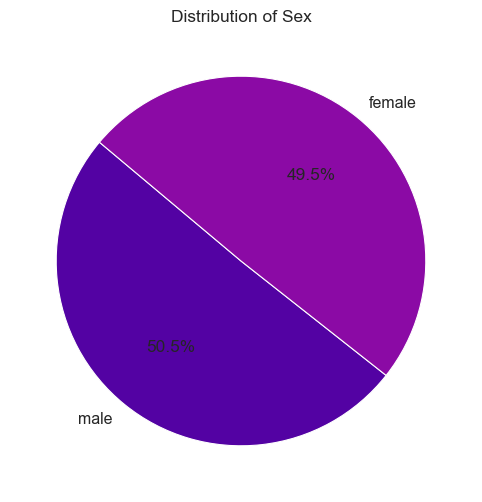

In [29]:
# Call the default plotting style function
set_plotting_style()

# Calculate the counts of each sex category
sex_counts = clean_medcost_df['sex'].value_counts()

# Create the pie chart
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of Sex')

# Show the plot
plt.show()

2. SMOKER

In [15]:
# Count the number of smokers and nonsmokers in our dataset                         
smoker_ = clean_medcost_df.groupby('smoker')[['smoker']].count().rename(columns={'smoker':'count'})
print(smoker_)

        count
smoker       
no       1063
yes       274


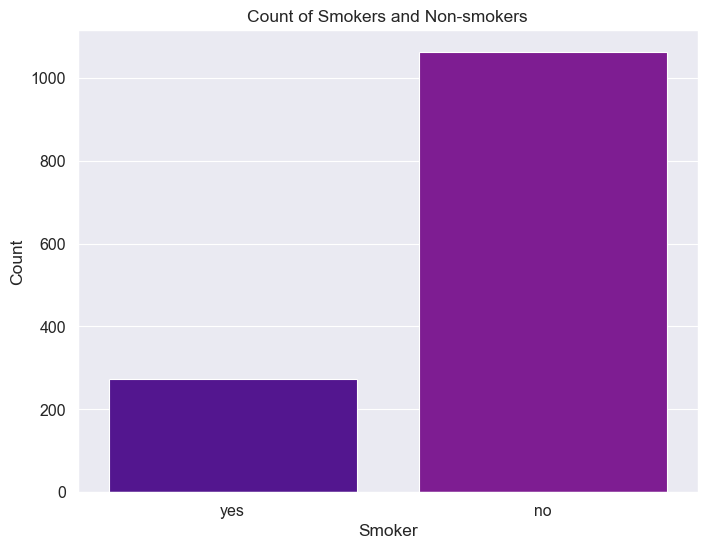

In [16]:
# Create the countplot
sns.countplot(x='smoker', data=clean_medcost_df)

# Set the title and labels
plt.title('Count of Smokers and Non-smokers')
plt.xlabel('Smoker')
plt.ylabel('Count')

# Show the plot
plt.show()

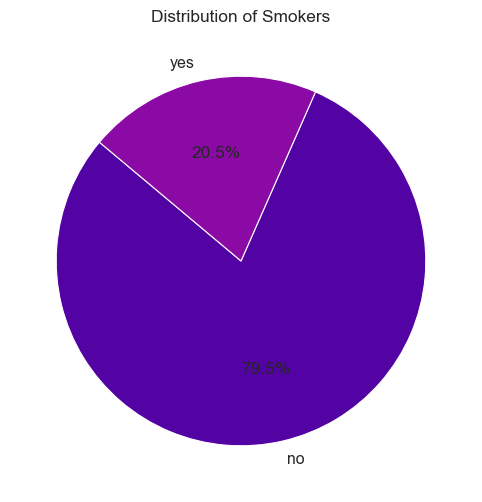

In [28]:
# Call the default plotting style function
set_plotting_style()

# Calculate the counts of each smoker category
smoker_counts = clean_medcost_df['smoker'].value_counts()

# Create the pie chart
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of Smokers')

# Show the plot
plt.show()

3. REGION

In [17]:
# Count the number of insured per region in our dataset                         
insured_region = clean_medcost_df.groupby('region')[['region']].count().rename(columns={'region':'count'})
print(insured_region)

           count
region          
northeast    324
northwest    324
southeast    364
southwest    325


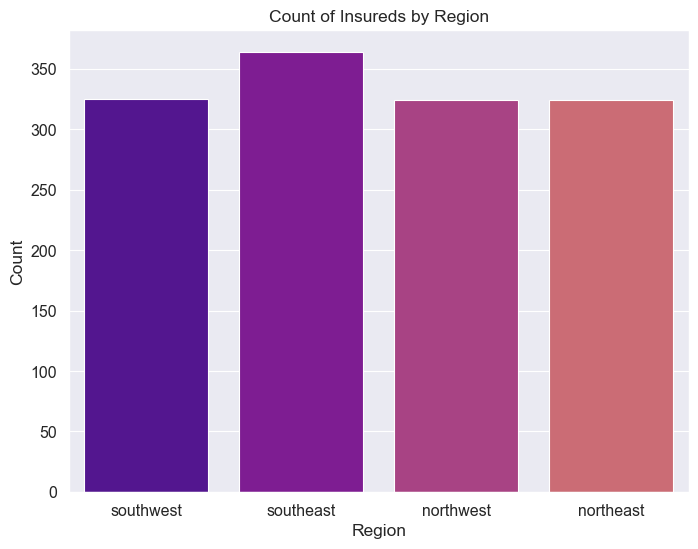

In [18]:
# Plot the Insured Per Region Count
sns.countplot(x='region', data=clean_medcost_df)

# Set the title and labels
plt.title('Count of Insureds by Region')
plt.xlabel('Region')
plt.ylabel('Count')

# Show the plot
plt.show()

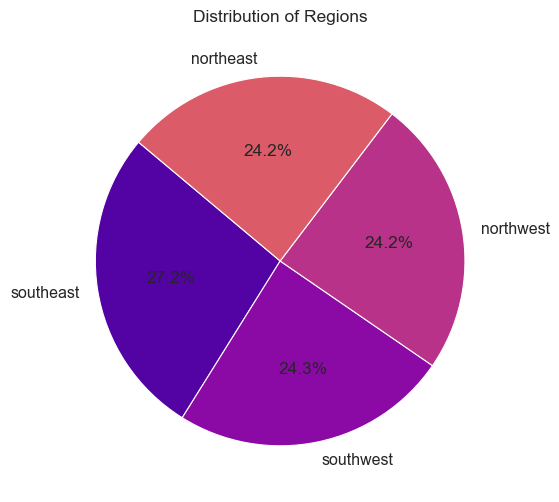

In [27]:
# Call the default plotting style function
set_plotting_style()

# Calculate the counts of each region
region_counts = clean_medcost_df['region'].value_counts()

# Create the pie chart
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of Regions')

# Show the plot
plt.show()

## Bivariate Analysis

### Numerical vs Numerical Features

1. AGE VS CHARGES

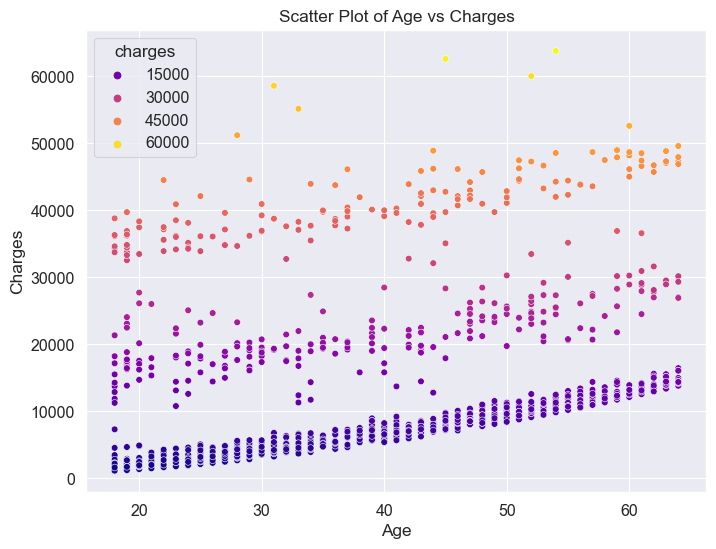

In [57]:
# Create a scatter plot of age vs charges with colorbar indicating charge amount
sns.scatterplot(x='age', y='charges', data=clean_medcost_df, hue='charges', palette='plasma')
plt.title('Scatter Plot of Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

# Show the plot
plt.show()

In [58]:
from scipy.stats import pearsonr

def calculate_pearson_correlation(df, col1, col2):
    """
    Calculates the Pearson correlation coefficient and p-value between two columns.
    """
    try:
        # Calculate Pearson correlation coefficient and p-value
        corr, pval = pearsonr(df[col1], df[col2])

        # Print the results
        print(f'Pearson correlation coefficient between {col1} and {col2}: {corr}')
        print(f'p-value: {pval}')
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    
    # Calculate Pearson correlation between 'age' and 'charges'
    calculate_pearson_correlation(clean_medcost_df, 'age', 'charges')

Pearson correlation coefficient between age and charges: 0.29830821250978634
p-value: 6.975748762687778e-29


The Pearson correlation coefficient between `age` and `charges` is 0.298, which indicates a positive correlation between the two variables. However, the correlation is not very strong, as the coefficient is less than 0.5. 

The p-value associated with the correlation coefficient is 6.975e-29, which is much less than 0.05. This indicates that the correlation is statistically significant, which means that there is strong evidence to reject the null hypothesis that there is no correlation between the variables. 

Therefore, we can conclude that there is a statistically significant positive correlation between `age` and `charges`, but the strength of the correlation is not very strong. It's important to note that correlation does not imply causation, and other factors may be influencing the relationship between the variables.


2. BMI VS CHARGES

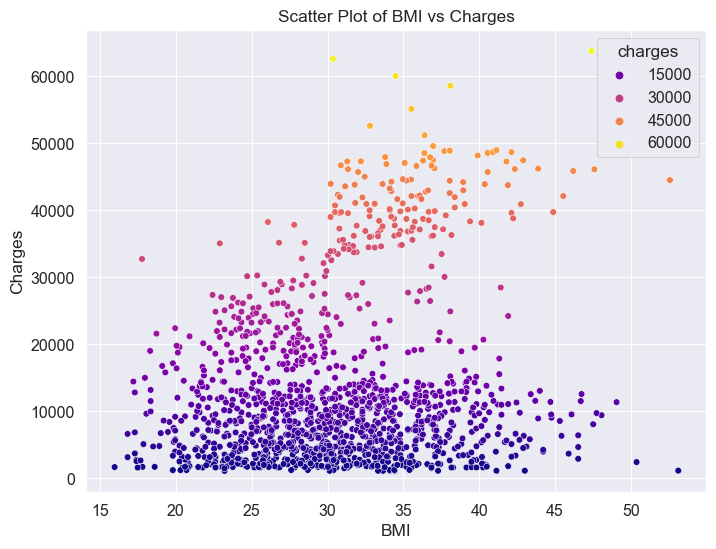

In [23]:
# Create a scatter plot of bmi vs charges with colorbar indicating charge amount
sns.scatterplot(x='bmi', y='charges', data=clean_medcost_df, hue='charges', palette='plasma')
plt.title('Scatter Plot of BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Show the plot
plt.show()

In [56]:
from scipy.stats import pearsonr

def calculate_pearson_correlation(df, col1, col2):
    """
    Calculates the Pearson correlation coefficient and p-value between two columns.
    """
    try:
        # Calculate Pearson correlation coefficient and p-value
        corr, pval = pearsonr(df[col1], df[col2])

        # Print the results
        print(f'Pearson correlation coefficient between {col1} and {col2}: {corr}')
        print(f'p-value: {pval}')
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    
    # Calculate Pearson correlation between 'bmi' and 'charges'
    calculate_pearson_correlation(clean_medcost_df, 'bmi', 'charges')


Pearson correlation coefficient between bmi and charges: 0.19840083122624938
p-value: 2.4680404264506985e-13


The Pearson correlation coefficient between `bmi` and `charges` is 0.198, which indicates a positive correlation between the two variables. However, the correlation is weak, as the coefficient is less than 0.5. 

The p-value associated with the correlation coefficient is 2.468e-13, which is much less than 0.05. This indicates that the correlation is statistically significant, which means that there is strong evidence to reject the null hypothesis that there is no correlation between the variables. 

Therefore, we can conclude that there is a statistically significant positive correlation between `bmi` and `charges`, but the strength of the correlation is weak. It's important to note that correlation does not imply causation, and other factors may be influencing the relationship between the variables.

3. CHILDREN VS CHARGES

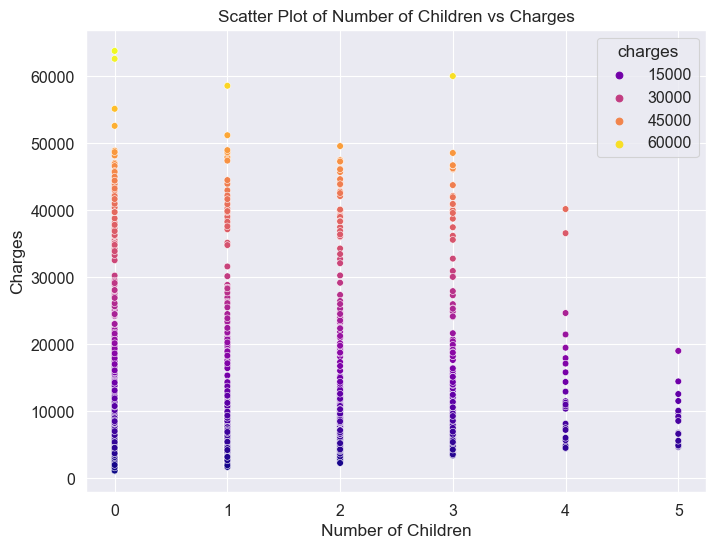

In [54]:
# Create a scatter plot of children vs charges with colorbar indicating charge amount
sns.scatterplot(x='children', y='charges', data=clean_medcost_df, hue='charges', palette='plasma')
plt.title('Scatter Plot of Number of Children vs Charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')

# Show the plot
plt.show()

In [55]:
from scipy.stats import pearsonr

def calculate_pearson_correlation(df, col1, col2):
    """
    Calculates the Pearson correlation coefficient and p-value between two columns.
    """
    try:
        # Calculate Pearson correlation coefficient and p-value
        corr, pval = pearsonr(df[col1], df[col2])

        # Print the results
        print(f'Pearson correlation coefficient between {col1} and {col2}: {corr}')
        print(f'p-value: {pval}')
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    
    # Calculate Pearson correlation between 'children' and 'charges'
    calculate_pearson_correlation(clean_medcost_df, 'children', 'charges')

Pearson correlation coefficient between children and charges: 0.06738935083963248
p-value: 0.013717026292980486


The Pearson correlation coefficient between `children` and `charges` is 0.067, which indicates a very weak positive correlation between the two variables. The coefficient is close to 0, suggesting that the relationship between the number of children and charges is not strong.

The p-value associated with the correlation coefficient is 0.0137, which is less than 0.05. This indicates that the correlation is statistically significant, which means that there is strong evidence to reject the null hypothesis that there is no correlation between the variables.

Therefore, we can conclude that there is a statistically significant but very weak positive correlation between the number of children and charges. It's important to note that correlation does not imply causation, and other factors may be influencing the relationship between the variables.

### Categorical vs Numerical Features

1. SEX VS CHARGES

In [32]:
# Change the display options to suppress scientific notation
pd.options.display.float_format = '{:.2f}'.format

# Group the data by 'sex' and select the 'charges' column
grouped_data = clean_medcost_df.groupby('sex')['charges']

# Define the aggregation functions
aggregation_functions = ['sum', 'min', 'max', 'mean', 'median', 'std']

# Apply the aggregation functions to the grouped data
charges_by_sex = grouped_data.agg(aggregation_functions)

# Print the results
print(charges_by_sex)

              sum     min      max     mean  median      std
sex                                                         
female 8321061.19 1607.51 63770.43 12569.58 9412.96 11128.70
male   9433124.23 1121.87 62592.87 13975.00 9377.90 12971.96


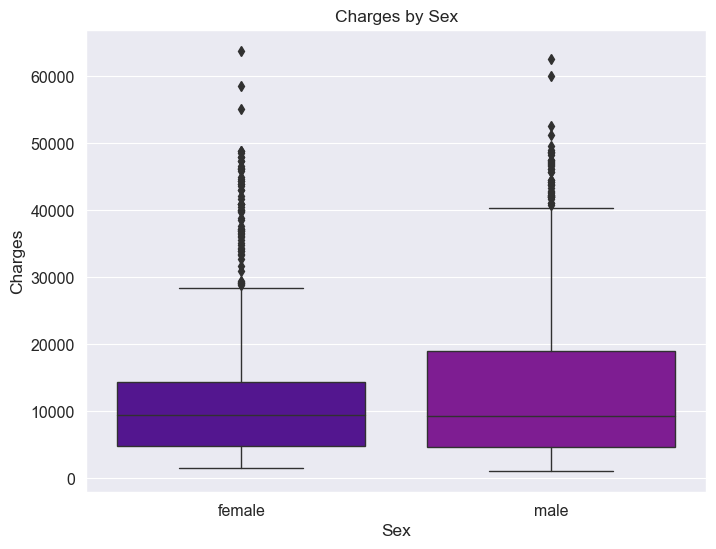

In [31]:
# Create the boxplot
sns.boxplot(x='sex', y='charges', data=clean_medcost_df)

# Set the title and labels
plt.title('Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')

# Show the plot
plt.show()

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in Charges between Males and Females")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in Charges between Males and Females")


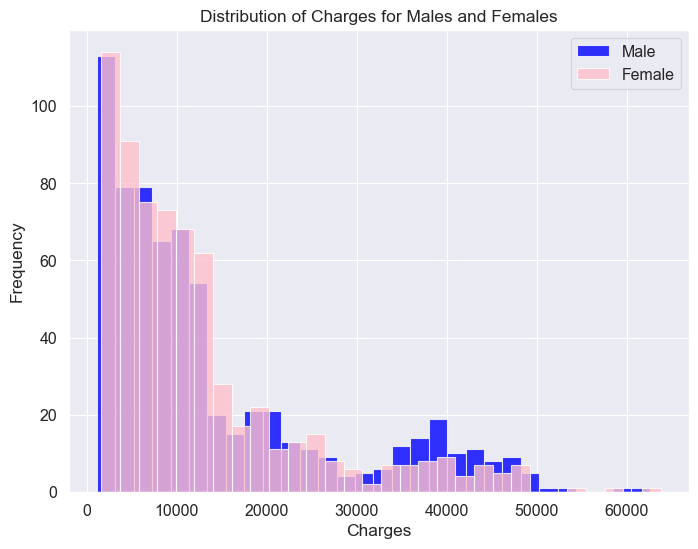

In [44]:
def plot_charges_by_sex(df):
    """
    Creates overlapping histograms of 'charges' for males and females.
    """
    try:
        # Apply the default Seaborn style
        set_plotting_style()

        # Separate data for males and females
        male_charges = df[df['sex'] == 'male']['charges']
        female_charges = df[df['sex'] == 'female']['charges']

        # Create overlapping histograms for males and females
        plt.hist(male_charges, bins=30, alpha=0.8, color='blue', label='Male')
        plt.hist(female_charges, bins=30, alpha=0.8, color='pink', label='Female')

        # Add a legend
        plt.legend()

        # Add title and labels
        plt.title('Distribution of Charges for Males and Females')
        plt.xlabel('Charges')
        plt.ylabel('Frequency')

        # Show the plot
        plt.show()
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    # Plot charges by sex
    plot_charges_by_sex(clean_medcost_df)

In [45]:
# Import necessary libraries
from scipy.stats import shapiro

def perform_shapiro_test(df):
    """
    Performs the Shapiro-Wilk test for normality on 'charges' for males and females.
    """
    try:
        # Separate the data for males and females
        male_charges = df[df['sex'] == 'male']['charges']
        female_charges = df[df['sex'] == 'female']['charges']

        # Perform the Shapiro-Wilk test for normality
        male_test_stat, male_p_value = shapiro(male_charges)
        female_test_stat, female_p_value = shapiro(female_charges)

        # Print the results
        print(f"Male charges: Test statistic = {male_test_stat}, p-value = {male_p_value}")
        print(f"Female charges: Test statistic = {female_test_stat}, p-value = {female_p_value}")
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    # Perform the Shapiro-Wilk test
    perform_shapiro_test(clean_medcost_df)

Male charges: Test statistic = 0.8230367302894592, p-value = 1.270790746325303e-26
Female charges: Test statistic = 0.8053942322731018, p-value = 1.830527656441053e-27


The p-values are much less than 0.05 (1.27e-26 for male charges and 1.83e-27 for female charges), so we reject the null hypothesis and conclude that the charges for both males and females do not follow a normal distribution. 

In [40]:
# Import necessary libraries
import numpy as np
from scipy.stats import mannwhitneyu

def conduct_mann_whitney(male_data, female_data):
    """
    Conducts a Mann-Whitney U test to determine if there is a difference between two groups.
    """
    try:
        # Perform the Mann-Whitney U test
        stat, p = mannwhitneyu(male_data, female_data)
        
        # Print the test statistic and p-value
        print(f'Statistic = {stat:.3f}, p-value = {p:.3f}')
        
        # Set the significance level
        alpha = 0.05
        
        # Interpret the results
        if p > alpha:
            print('There is no significant difference in the charges for males and females (fail to reject H0)')
        else:
            print('There is a significant difference in the charges for males and females (reject H0)')
        
        return stat, p
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    # Extract charges for males and females
    male_charges = clean_medcost_df[clean_medcost_df["sex"] == "male"]["charges"]
    female_charges = clean_medcost_df[clean_medcost_df["sex"] == "female"]["charges"]
    
    # Conduct the Mann-Whitney U test
    conduct_mann_whitney(male_charges, female_charges)   

Statistic = 226198.000, p-value = 0.694
There is no significant difference in the charges for males and females (fail to reject H0)


2. SMOKER VS CHARGES

In [41]:
# Import necessary libraries
import pandas as pd

def calculate_charges_by_smoking(df):
    """
    Calculates various statistics for 'charges' grouped by 'smoker' status.
    """
    try:
        # Define the aggregation functions
        aggregation_functions = ['sum', 'min', 'max', 'mean', 'median', 'std']
        
        # Group the data by 'smoker' and select the 'charges' column
        grouped_data = df.groupby('smoker')['charges']
        
        # Apply the aggregation functions to the grouped data
        charges_by_smoking_status = grouped_data.agg(aggregation_functions)
        
        return charges_by_smoking_status
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    
    # Calculate charges by smoking status
    charges_by_smoking_status = calculate_charges_by_smoking(clean_medcost_df)
    
    # Display the results
    print(charges_by_smoking_status)

              sum      min      max     mean   median      std
smoker                                                        
no     8972421.91  1121.87 36910.61  8440.66  7345.73  5992.97
yes    8781763.52 12829.46 63770.43 32050.23 34456.35 11541.55


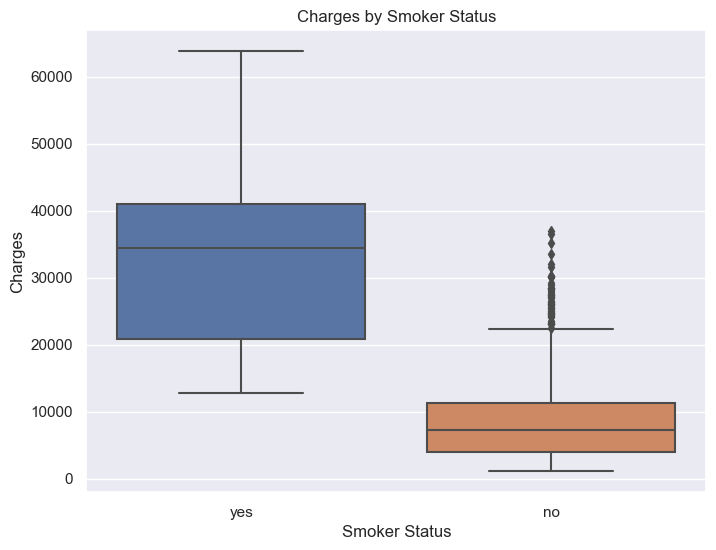

In [42]:
# Create the boxplot
sns.boxplot(x='smoker', y='charges', data=clean_medcost_df)

# Set the title and labels
plt.title('Charges by Smoker Status')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')

# Show the plot
plt.show()

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in Charges between Smokers and Non-smokers")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in Charges between Smokers and Non-smokers")


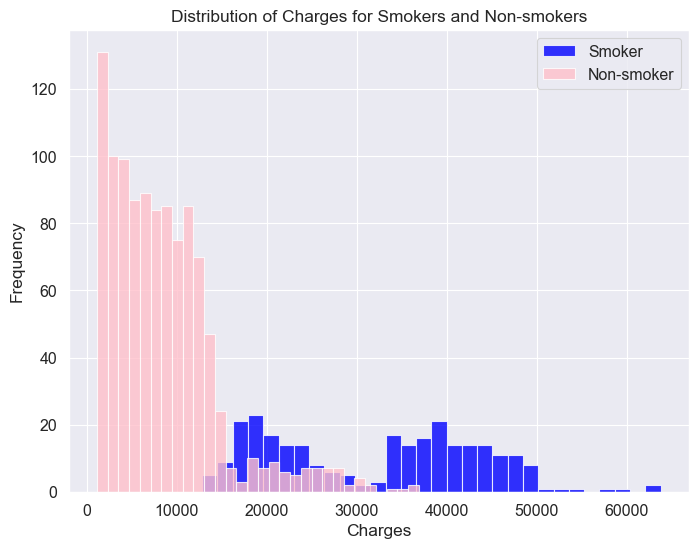

In [43]:
def plot_charges_by_smoker(df):
    """
    Creates overlapping histograms of 'charges' for smokers and non-smokers.
    """
    try:
        # Apply the default Seaborn style
        set_plotting_style()

        # Separate data for smokers and non-smokers
        smoker_charges = df[df['smoker'] == 'yes']['charges']
        non_smoker_charges = df[df['smoker'] == 'no']['charges']

        # Create overlapping histograms for smokers and non-smokers
        plt.hist(smoker_charges, bins=30, alpha=0.8, color='blue', label='Smoker')
        plt.hist(non_smoker_charges, bins=30, alpha=0.8, color='pink', label='Non-smoker')

        # Add a legend
        plt.legend()

        # Add title and labels
        plt.title('Distribution of Charges for Smokers and Non-smokers')
        plt.xlabel('Charges')
        plt.ylabel('Frequency')

        # Show the plot
        plt.show()
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    
   # Plot charges by smoker status
    plot_charges_by_smoker(clean_medcost_df)

In [46]:
def perform_shapiro_test(df):
    """
    Performs the Shapiro-Wilk test for normality on 'charges' for smokers and non-smokers.
    """
    try:
        # Separate the data for smokers and non-smokers
        smoker_charges = df[df['smoker'] == 'yes']['charges']
        non_smoker_charges = df[df['smoker'] == 'no']['charges']

        # Perform the Shapiro-Wilk test for normality
        smoker_test_stat, smoker_p_value = shapiro(smoker_charges)
        non_smoker_test_stat, non_smoker_p_value = shapiro(non_smoker_charges)

        # Print the results
        print(f"Smoker charges: Test statistic = {smoker_test_stat}, p-value = {smoker_p_value}")
        print(f"Non-smoker charges: Test statistic = {non_smoker_test_stat}, p-value = {non_smoker_p_value}")
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    # Perform the Shapiro-Wilk test
    perform_shapiro_test(clean_medcost_df)

Smoker charges: Test statistic = 0.9395526647567749, p-value = 3.6255991542333277e-09
Non-smoker charges: Test statistic = 0.8729138374328613, p-value = 1.503623581761669e-28


The p-values are much less than 0.05 (3.63e-09 for smoker charges and 1.50e-28 for non-smoker charges), so we reject the null hypothesis and conclude that the charges for both smokers and non-smokers do not follow a normal distribution. 

In [47]:
# Conduct a Mann-Whitney U test


from scipy.stats import mannwhitneyu, ttest_ind


def conduct_mann_whitney(smoker_data, non_smoker_data):
    """
    Conducts a Mann-Whitney U test to determine if there is a difference between two groups.
    """
    try:
        # Perform the Mann-Whitney U test
        stat, p = mannwhitneyu(smoker_data, non_smoker_data)
        
        # Print the test statistic and p-value
        print(f'Statistic = {stat:.3f}, p-value = {p:.3f}')
        
        # Set the significance level
        alpha = 0.05
        
        # Interpret the results
        if p > alpha:
            print('There is no significant difference in the charges for smokers and non-smokers (fail to reject H0)')
        else:
            print('There is a significant difference in the charges for smokers and non-smokers (reject H0)')
        
        return stat, p
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    # Extract charges for smokers and non-smokers
    smoker_charges = clean_medcost_df[clean_medcost_df["smoker"] == "yes"]["charges"]
    non_smoker_charges = clean_medcost_df[clean_medcost_df["smoker"] == "no"]["charges"]
    
    # Conduct the Mann-Whitney U test
    conduct_mann_whitney(smoker_charges, non_smoker_charges)
    

Statistic = 283859.000, p-value = 0.000
There is a significant difference in the charges for smokers and non-smokers (reject H0)


3. REGION VS CHARGES

In [48]:
def calculate_charges_by_region(df):
    """
    Calculates various statistics for 'charges' grouped by 'region'.
    """
    try:
        # Define the aggregation functions
        aggregation_functions = ['sum', 'min', 'max', 'mean', 'median', 'std']
        
        # Group the data by 'region' and select the 'charges' column
        grouped_data = df.groupby('region')['charges']
        
        # Apply the aggregation functions to the grouped data
        charges_by_region = grouped_data.agg(aggregation_functions)
        
        return charges_by_region
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    
    # Calculate charges by region
    charges_by_region = calculate_charges_by_region(clean_medcost_df)
    
    # Display the results
    print(charges_by_region)

                 sum     min      max     mean   median      std
region                                                          
northeast 4343668.58 1694.80 58571.07 13406.38 10057.65 11255.80
northwest 4034072.43 1621.34 60021.40 12450.84  8976.98 11073.13
southeast 5363689.76 1121.87 63770.43 14735.41  9294.13 13971.10
southwest 4012754.65 1241.57 52590.83 12346.94  8798.59 11557.18


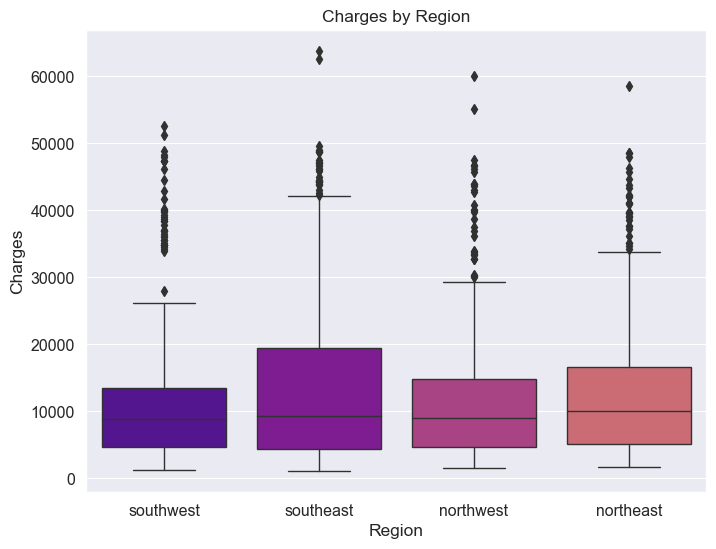

In [49]:
# Create the boxplot
sns.boxplot(x='region', y='charges', data=clean_medcost_df)

# Set the title and labels
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')

# Show the plot
plt.show()

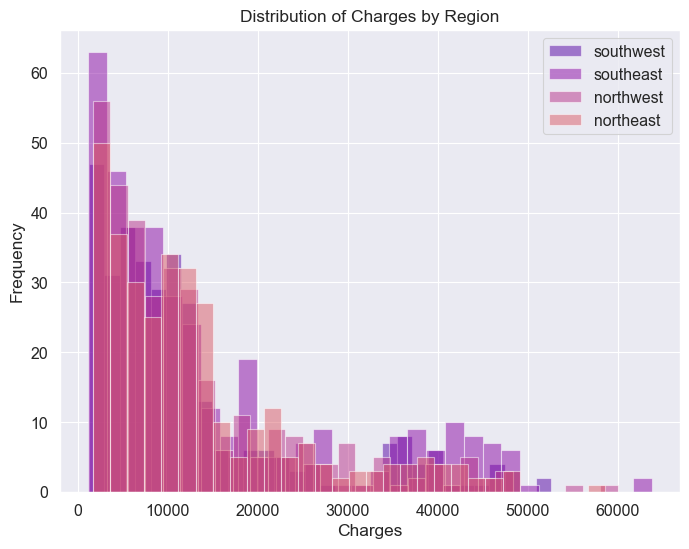

In [51]:
def plot_charges_by_region(df):
    """
    Creates overlapping histograms of 'charges' for different regions.
    """
    try:
        # Apply the default Seaborn style
        set_plotting_style()

        # Get unique regions
        regions = df['region'].unique()

        # Create overlapping histograms for each region
        for region in regions:
            region_charges = df[df['region'] == region]['charges']
            plt.hist(region_charges, bins=30, alpha=0.5, label=region)

        # Add a legend
        plt.legend()

        # Add title and labels
        plt.title('Distribution of Charges by Region')
        plt.xlabel('Charges')
        plt.ylabel('Frequency')

        # Show the plot
        plt.show()
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    
   # Plot charges by region
    plot_charges_by_region(clean_medcost_df)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in Charges between different Regions")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in Charges between different Regions")


In [52]:
from scipy.stats import kruskal

def perform_kruskal_wallis_test(df):
    """
    Performs the Kruskal-Wallis test on 'charges' for each 'region'.
    """
    try:
        # Separate charges for each region
        regions = df['region'].unique()
        charges = [df[df['region'] == region]['charges'] for region in regions]

        # Perform the Kruskal-Wallis test
        stat, p = kruskal(*charges)

        # Print the results
        print('statistic = %.3f, p-vaue = %.3f' % (stat, p))

        # Interpret
        alpha = 0.05
        if p > alpha:
            print('There is no significant difference in Charges for the different regions (fail to reject H0)')
        else:
            print('There is a significant difference in Charges for the different regions (reject H0)')
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    
    # Perform the Kruskal-Wallis test
    perform_kruskal_wallis_test(clean_medcost_df)

statistic = 4.623, p-vaue = 0.202
There is no significant difference in Charges for the different regions (fail to reject H0)


## Multivariate Analysis

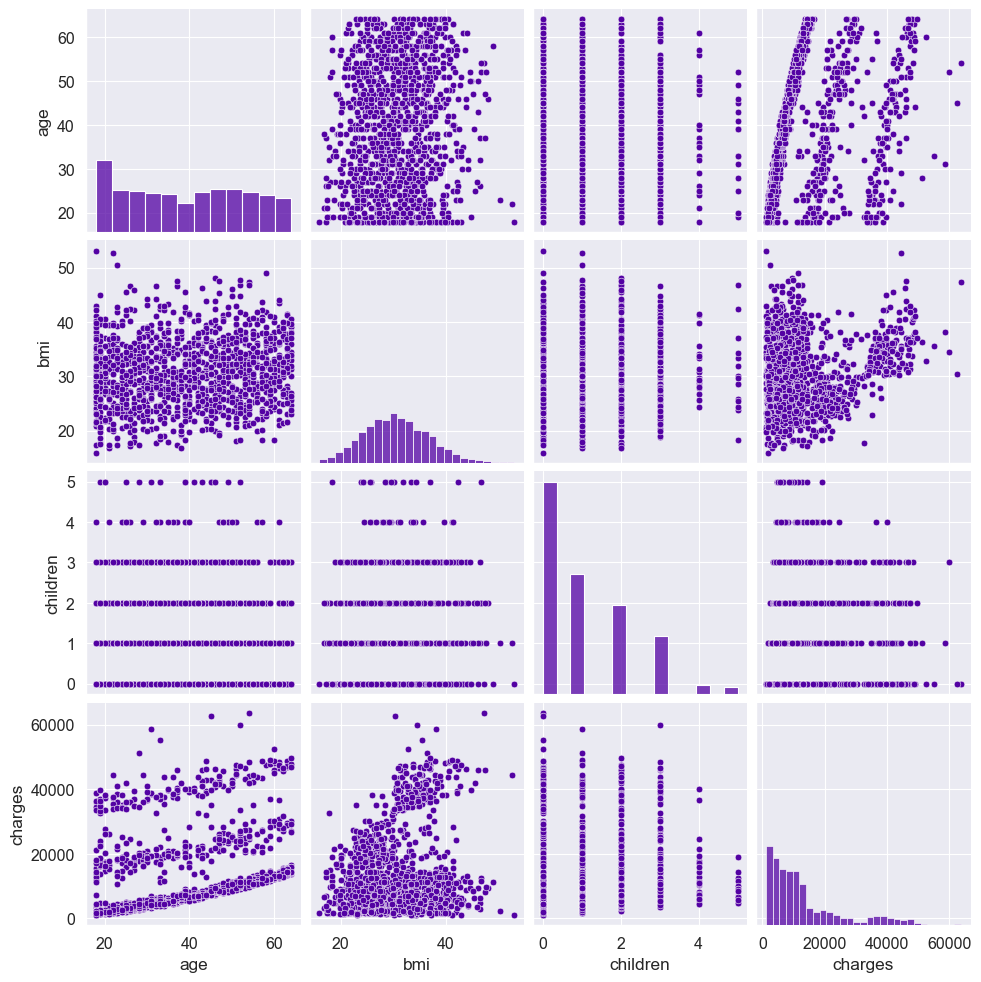

In [59]:
import seaborn as sns

def perform_multivariate_analysis(df):
    """
    Performs a multivariate analysis on the dataframe.
    """
    try:
        # Perform the multivariate analysis
        sns.pairplot(df)

        # Show the plot
        plt.show()
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    
    # Perform the multivariate analysis
    perform_multivariate_analysis(clean_medcost_df)

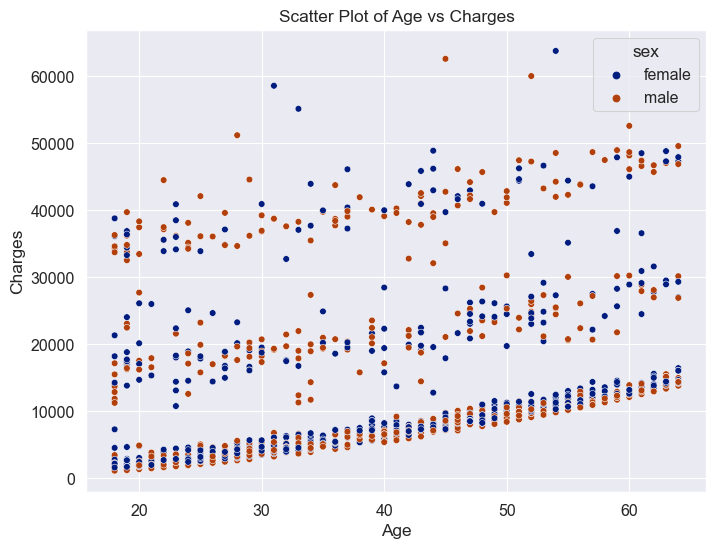

In [67]:
def plot_age_vs_charges(df):
    """
    Creates a scatter plot of 'age' vs 'charges' with different colors for 'sex'.
    """
    try:
        # Create the scatter plot
        sns.scatterplot(x='age', y='charges', hue='sex', data=df, palette='dark')

        # Add title and labels
        plt.title('Scatter Plot of Age vs Charges')
        plt.xlabel('Age')
        plt.ylabel('Charges')

        # Show the plot
        plt.show()
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    
    # Create the scatter plot
    plot_age_vs_charges(clean_medcost_df)

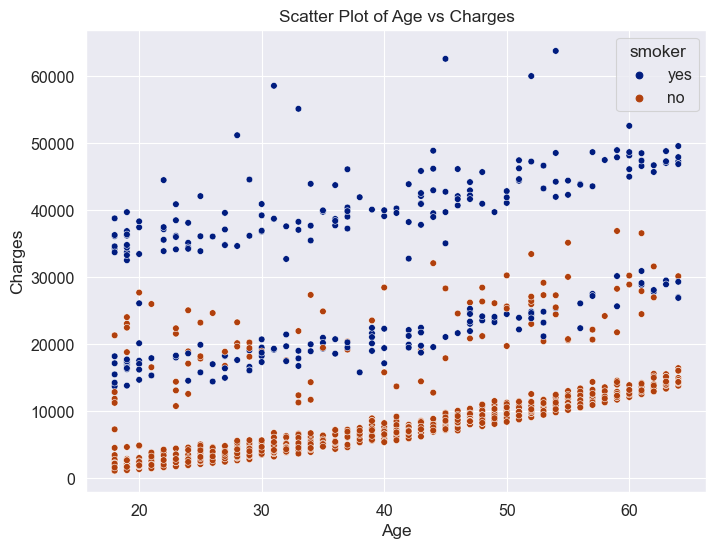

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_age_vs_charges(df):
    """
    Creates a scatter plot of 'age' vs 'charges' with different colors for 'smoker'.
    """
    try:
        # Create the scatter plot
        sns.scatterplot(x='age', y='charges', hue='smoker', data=df, palette='dark')

        # Add title and labels
        plt.title('Scatter Plot of Age vs Charges')
        plt.xlabel('Age')
        plt.ylabel('Charges')

        # Show the plot
        plt.show()
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    
    # Create the scatter plot
    plot_age_vs_charges(clean_medcost_df)

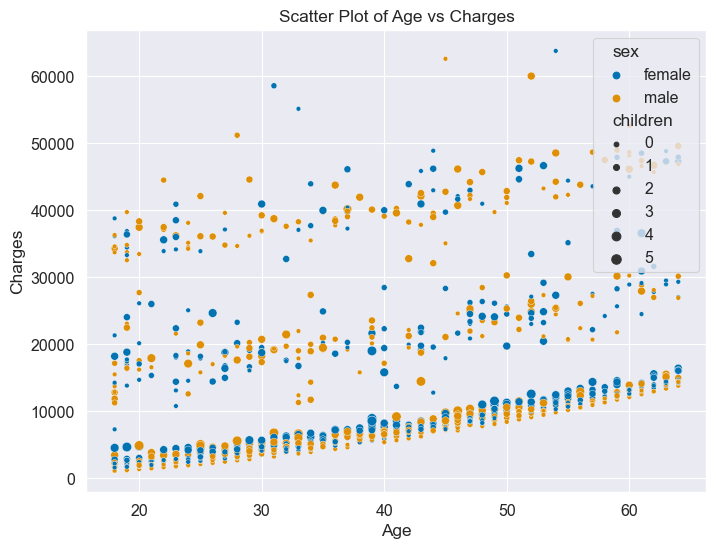

In [74]:
def plot_age_vs_charges(df):
    """
    Creates a scatter plot of 'age' vs 'charges' with different colors for 'sex' and sizes for 'children'.
    """
    try:
        # Create the scatter plot
        sns.scatterplot(x='age', y='charges', hue='sex', size='children', data=df, palette='colorblind')

        # Add title and labels
        plt.title('Scatter Plot of Age vs Charges')
        plt.xlabel('Age')
        plt.ylabel('Charges')

        # Show the plot
        plt.show()
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    
    # Create the scatter plot
    plot_age_vs_charges(clean_medcost_df)

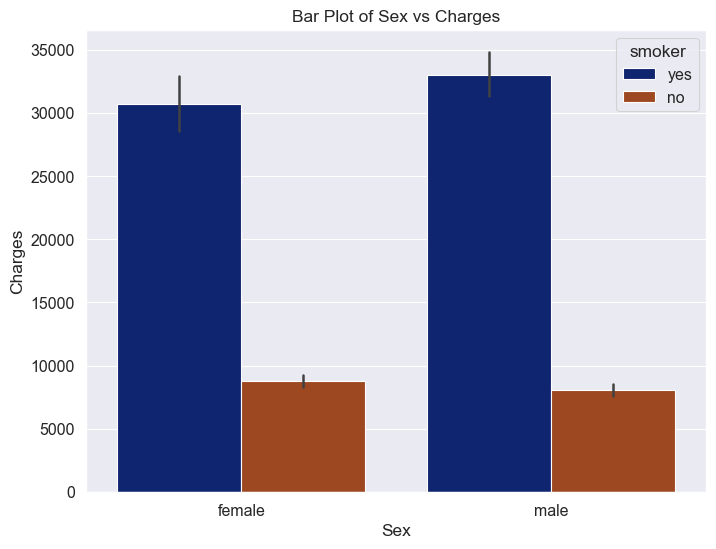

In [99]:
def plot_sex_vs_charges(df):
    """
    Creates a bar plot of 'sex' vs 'charges' with different colors for 'smoker'.
    """
    try:
        # Create the bar plot
        plt.figure(figsize=(8,6))
        sns.barplot(x='sex', y='charges', hue='smoker', palette= 'dark', data=df)

        # Add title and labels
        plt.title('Bar Plot of Sex vs Charges')
        plt.xlabel('Sex')
        plt.ylabel('Charges')

        # Show the plot
        plt.show()
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    
    # Create the bar plot
    plot_sex_vs_charges(clean_medcost_df)